In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


Bad key text.latex.preview in file C:\Users\han13\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\han13\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\han13\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
data_path = '../data/SILSO data/SN_m_tot_V2.0.csv'

data = pd.read_csv(data_path, sep=';', names=['year', 'month', 'year_frac', 'ssn_total', 'ssn_stdev', 'nobs', 'marker'])
data

,year,month,year_frac,ssn_total,ssn_stdev,nobs,marker
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3270,2021,7,2021.538,34.4,9.1,1222,0
3271,2021,8,2021.623,22.4,7.7,1250,0
3272,2021,9,2021.705,51.5,9.6,1151,0
3273,2021,10,2021.790,38.1,8.2,1124,0


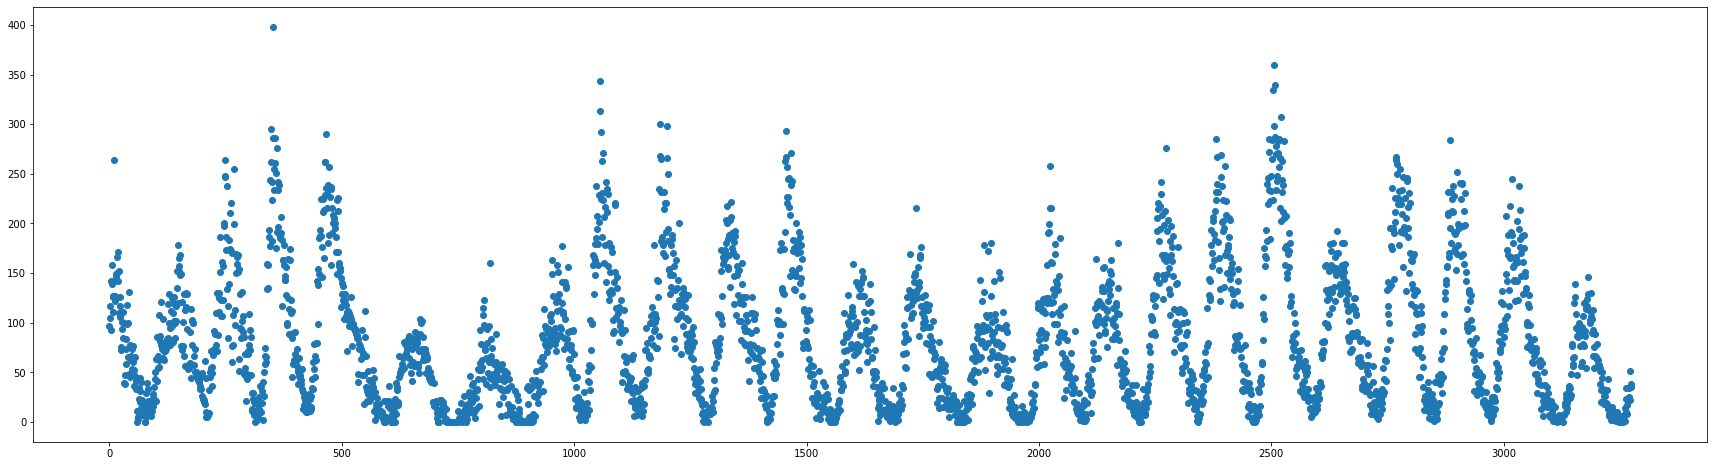

In [3]:
plt.figure(figsize=(30, 8))
plt.scatter(range(len(data)), data['ssn_total'])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3275
Model:                     ARMA(1, 1)   Log Likelihood              -15218.673
Method:                       css-mle   S.D. of innovations             25.220
Date:                Mon, 03 Jan 2022   AIC                          30445.346
Time:                        07:31:11   BIC                          30469.723
Sample:                             0   HQIC                         30454.076
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3066     10.658      7.629      0.000      60.418     102.195
ar.L1.y        0.9779      0.004    250.128      0.000       0.970       0.986
ma.L1.y       -0.4582      0.019    -24.150      0.0

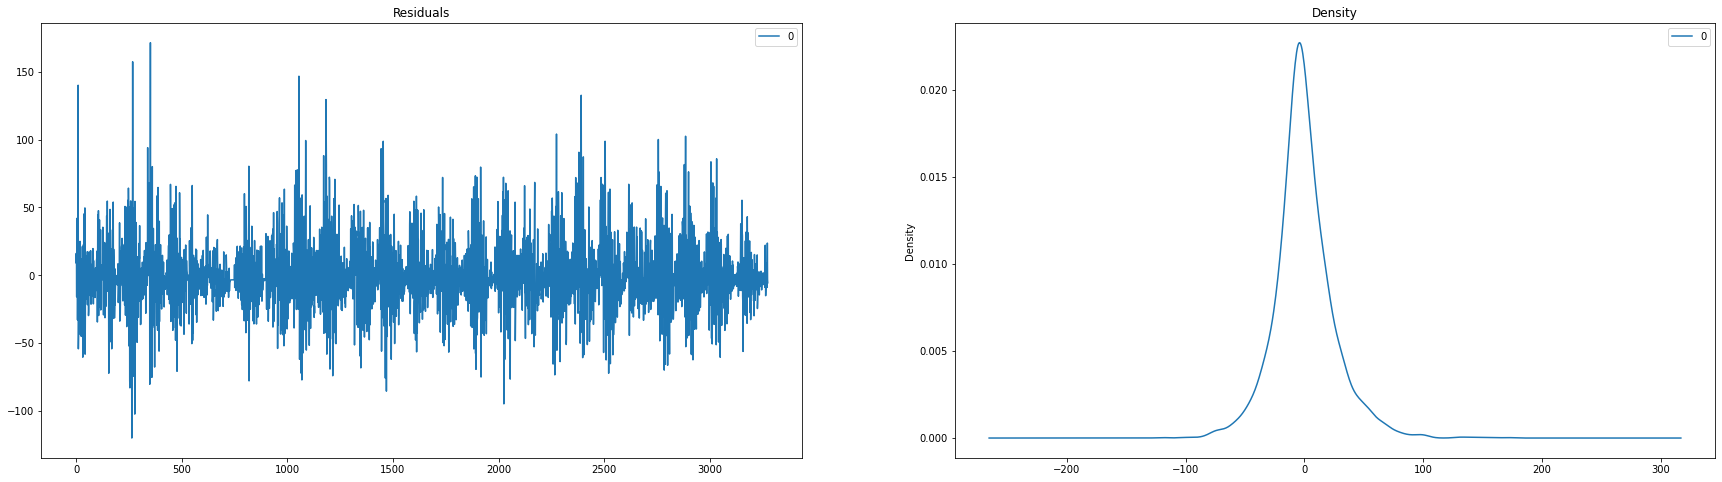

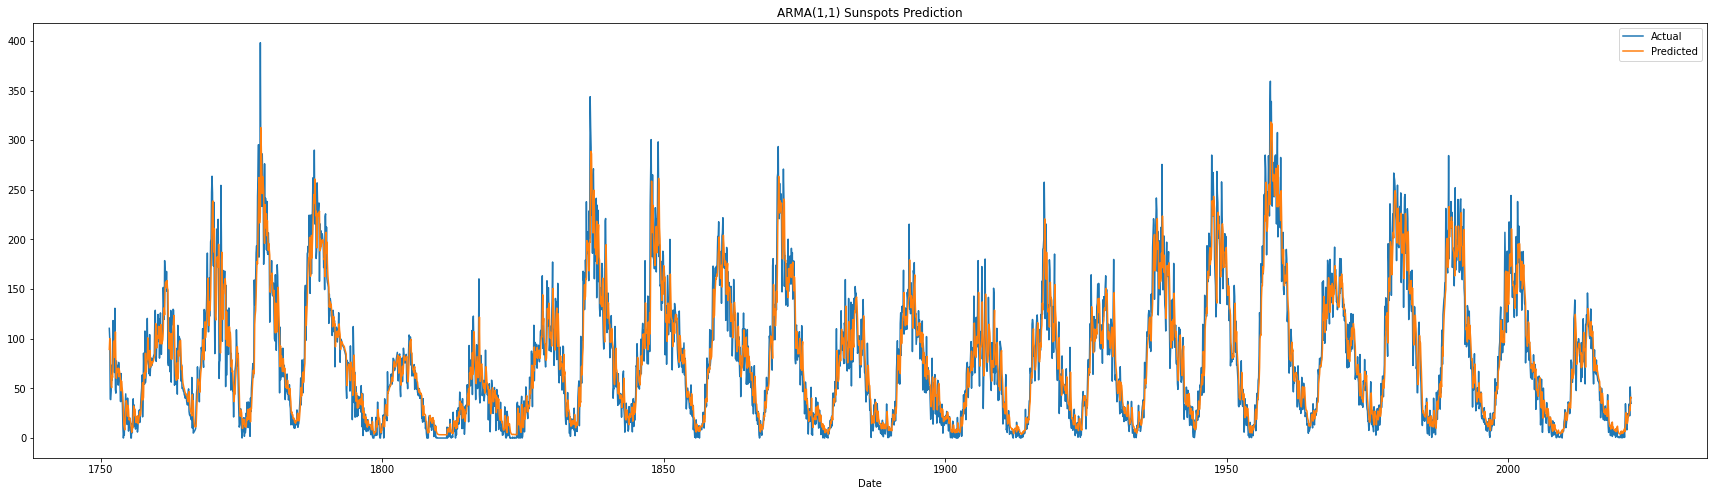

In [4]:
# ARIMA model 
from statsmodels.tsa.arima_model import ARIMA

y = np.array(data['ssn_total'])
model = ARIMA(y, order=(1,0,1)) #ARMA(1,1) model
model_fit = model.fit(disp = 0)

print(model_fit.summary())# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(30, 8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()# Actual vs Fitted

cut_t = 30
predictions = model_fit.predict()
plot = pd.DataFrame({'Date':data.loc[cut_t:, 'year_frac'],'Actual':abs(y[cut_t:]),"Predicted": predictions[cut_t:]})
plot.plot(x='Date',y=['Actual','Predicted'],title = 'ARMA(1,1) Sunspots Prediction',legend = True, figsize=(30,8))
RMSE = np.sqrt(np.mean(residuals**2))

In [6]:
help(model_fit.predict)

Help on method predict in module statsmodels.tsa.arima_model:

predict(start=None, end=None, exog=None, dynamic=False, **kwargs) method of statsmodels.tsa.arima_model.ARMAResultsWrapper instance
    predict(self, start=None, end=None, exog=None, dynamic=False, **kwargs)
    
    ARMA model in-sample and out-of-sample prediction
    
    Parameters
    ----------
    
    start : int, str, or datetime
        Zero-indexed observation number at which to start forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    end : int, str, or datetime
        Zero-indexed observation number at which to end forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type. However, if the dates index does not
        have a fixed frequency, end must be an integer index if you
        want out of sample prediction.
    exog : array_like, optional
        If the model is an ARMAX and o


Name : GP regression
Objective : 1457353.8302635103
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.5  |      +ve      |        
  rbf.lengthscale          |    3.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x2b9636c2708>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2b96425de08>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2b94b980408>]}

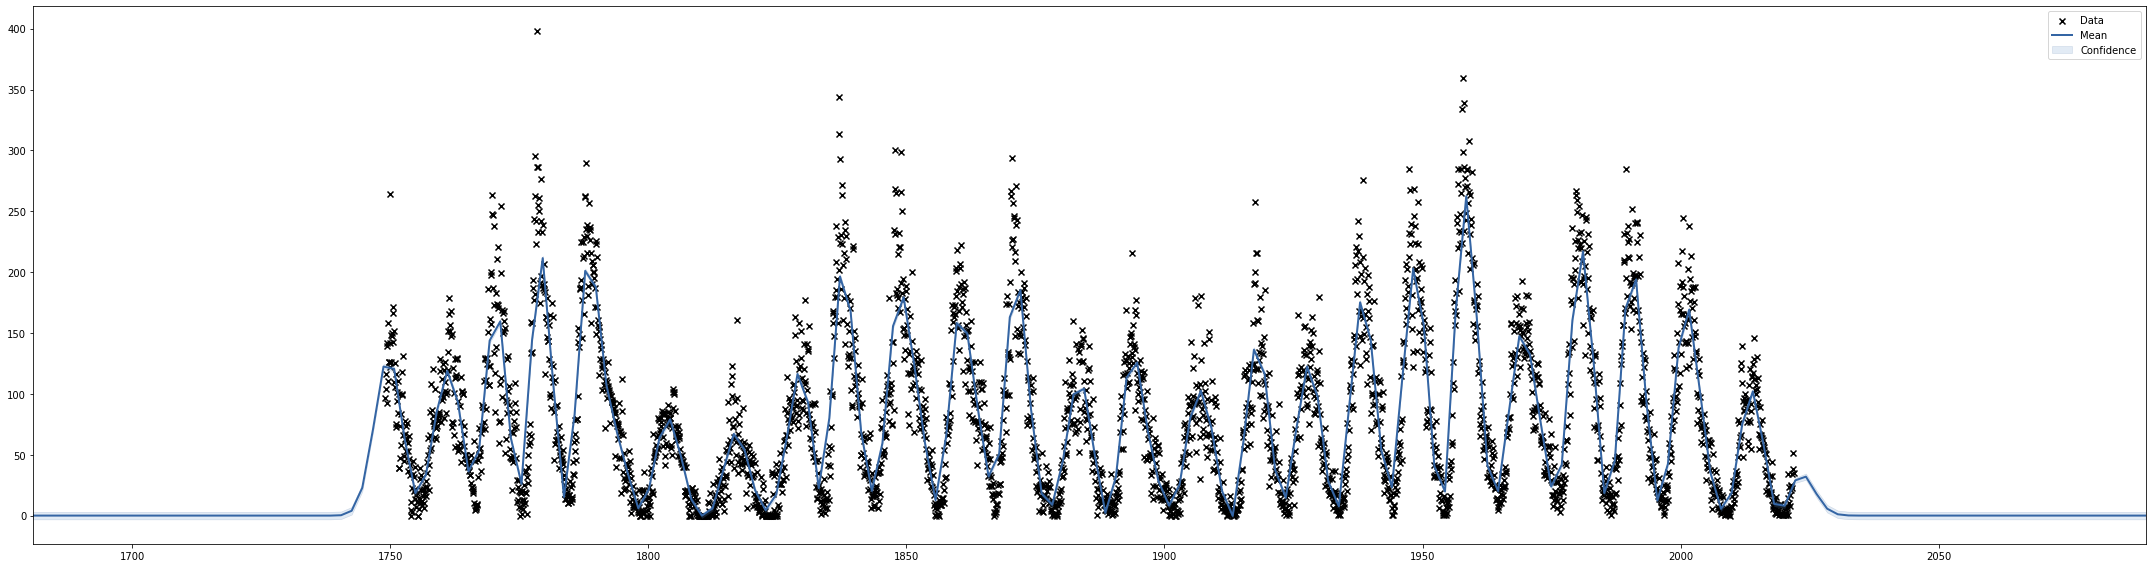

In [5]:
# fit a gaussian process 
import GPy, GPyOpt 

sigma_f, l = 1.5, 3
kernel = GPy.kern.RBF(1, sigma_f, l)

X = np.array(data['year_frac']).reshape(-1, 1)
y = np.array(data['ssn_total']).reshape(-1, 1)
model = GPy.models.GPRegression(X,y,kernel) 
print(model)
model.plot(figsize=(30,8))

In [9]:
help(model.optimize)

Help on method optimize in module GPy.core.gp:

optimize(optimizer=None, start=None, messages=False, max_iters=1000, ipython_notebook=True, clear_after_finish=False, **kwargs) method of GPy.models.gp_regression.GPRegression instance
    Optimize the model using self.log_likelihood and self.log_likelihood_gradient, as well as self.priors.
    kwargs are passed to the optimizer. They can be:
    
    :param max_iters: maximum number of function evaluations
    :type max_iters: int
    :param messages: whether to display during optimisation
    :type messages: bool
    :param optimizer: which optimizer to use (defaults to self.preferred optimizer), a range of optimisers can be found in :module:`~GPy.inference.optimization`, they include 'scg', 'lbfgs', 'tnc'.
    :type optimizer: string
    :param bool ipython_notebook: whether to use ipython notebook widgets or not.
    :param bool clear_after_finish: if in ipython notebook, we can clear the widgets after optimization.



In [11]:
# TODO find out more about the optimisers used and which one to use; probably ok to stick with default
model.preferred_optimizer

'lbfgsb'

Time taken to optimize: 167.30442070960999

Name : GP regression
Objective : 15760.953078466946
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1051.7643816812913  |      +ve      |        
  rbf.lengthscale          |   1.773879130679441  |      +ve      |        
  Gaussian_noise.variance  |   869.0592358387572  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x2d285437288>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d28553df08>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d285549a48>]}

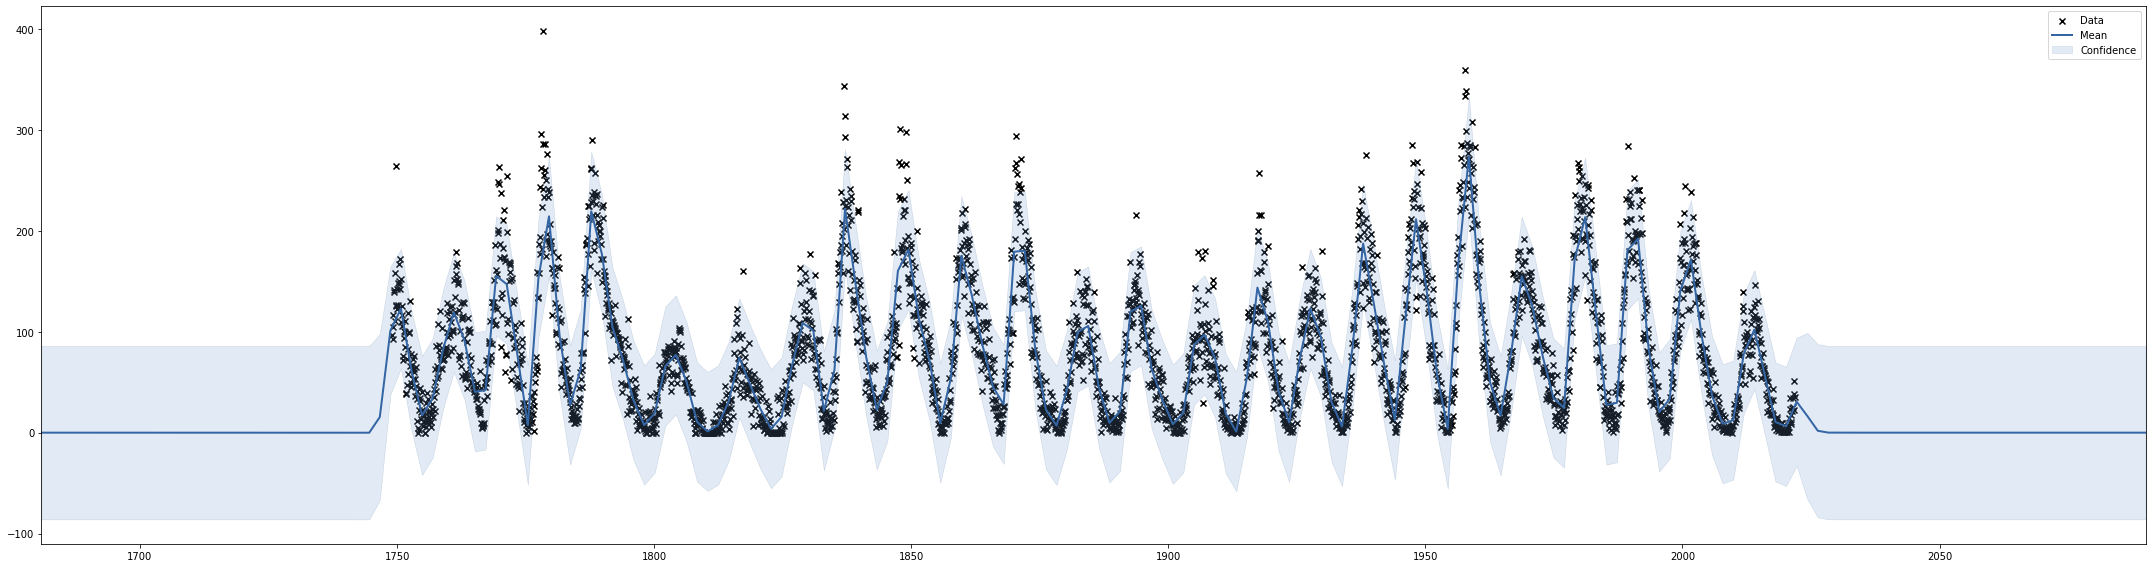

In [10]:
import time
start = time.time()
model.optimize(max_iters=20, messages=True)
print('Time taken to optimize:', time.time() - start)
print(model)
model.plot(figsize=(30,8))

Time taken to optimize: 184.47358345985413

Name : gp
Objective : 22043.310867322223
Number of Parameters : 3277
Number of Optimization Parameters : 3277
Updates : True
Parameters:
  gp.                 |                value  |  constraints  |  priors
  rbf.variance        |   1169.2518196320755  |      +ve      |        
  rbf.lengthscale     |  0.08664487971265598  |      +ve      |        
  het_Gauss.variance  |            (3275, 1)  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x2d285643488>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d28566f348>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d285697788>]}

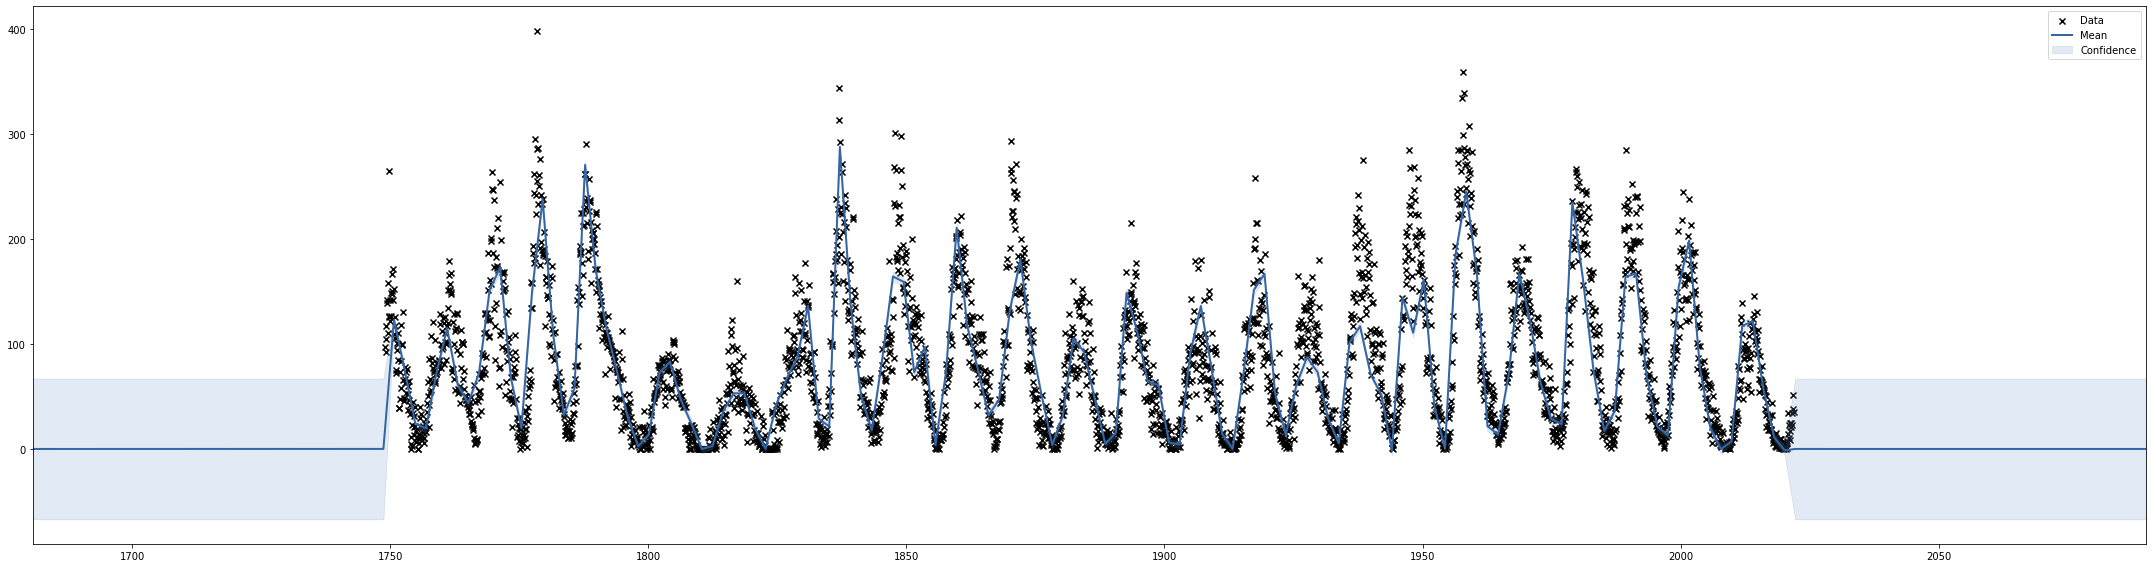

In [13]:
# use heteroscedastic model 
model_hetero = GPy.models.GPHeteroscedasticRegression(X,y,kernel)

model_hetero.optimize(max_iters=20, messages=True)
model_hetero.plot(figsize=(30,8))

{'inducing': <matplotlib.collections.PathCollection at 0x2d285680d48>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x2d285726e88>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d285750f48>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d28573f7c8>]}

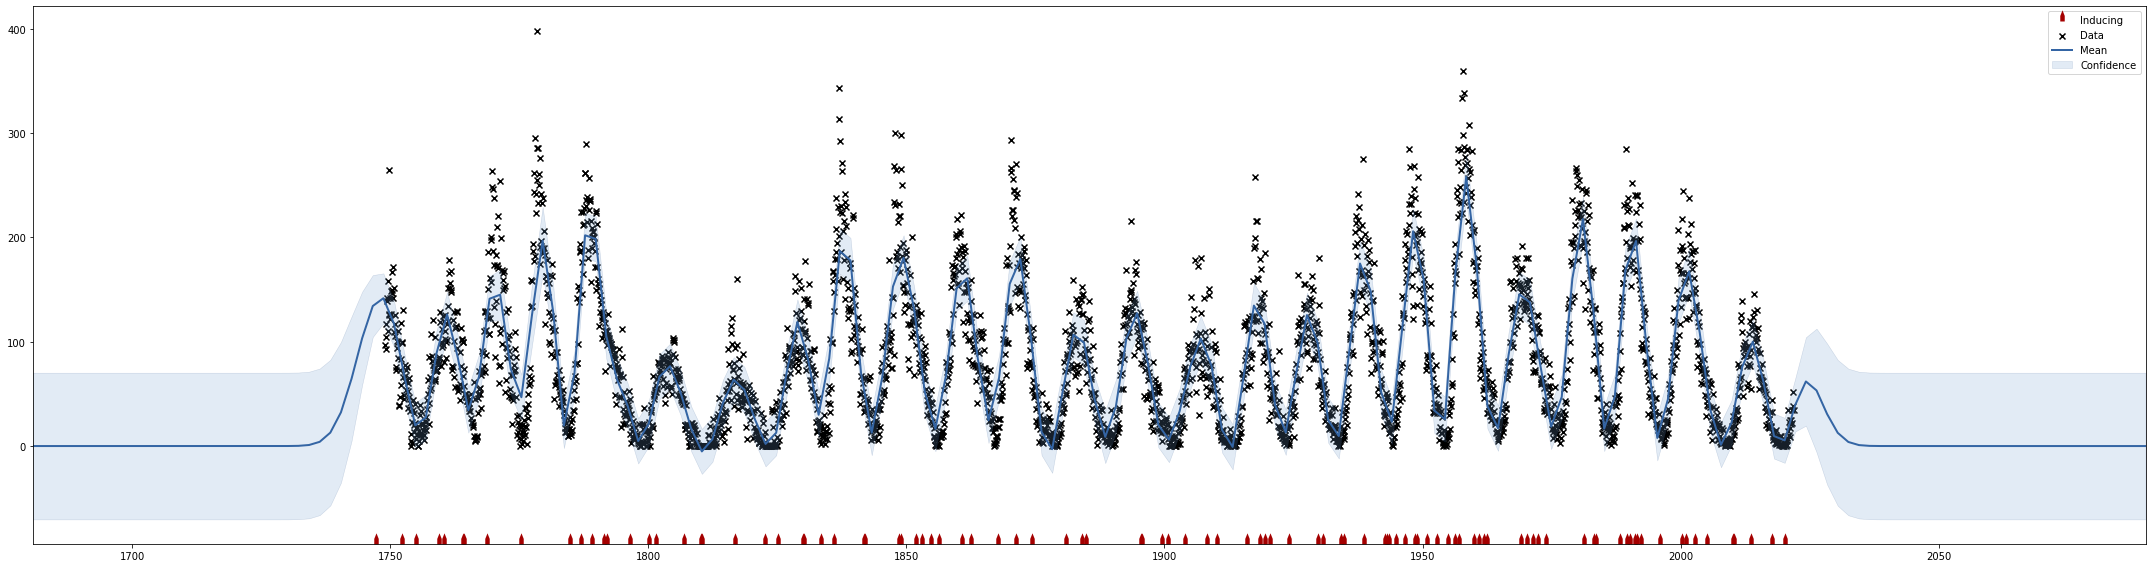

In [14]:
# use sparse model 
# http://krasserm.github.io/2020/12/12/gaussian-processes-sparse/
model_sparse = GPy.models.SparseGPRegression(X,y,kernel,num_inducing=100)

model_sparse.optimize(max_iters=20, messages=True)
model_sparse.plot(figsize=(30,8))

In [ ]:
# for some kernels see: https://nbviewer.org/github/SheffieldML/notebook/blob/master/GPy/basic_kernels.ipynb
#   https://gpy.readthedocs.io/en/deploy/_images/inheritance-54205df7a5a3653853c0a1226c1c0066d75f80e9.png
# heteroscedastic regression: https://nbviewer.org/github/SheffieldML/notebook/blob/master/GPy/heteroscedastic_regression.ipynb


In [ ]:
[i for i in dir(GPy.kern) if 'eriodic' in i]

['PeriodicExponential',
 'PeriodicMatern32',
 'PeriodicMatern52',
 'StdPeriodic',
 'sde_StdPeriodic']

{'dataplot': [<matplotlib.collections.PathCollection at 0x2d285cbb1c8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d285d01e88>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d285d17d48>]}

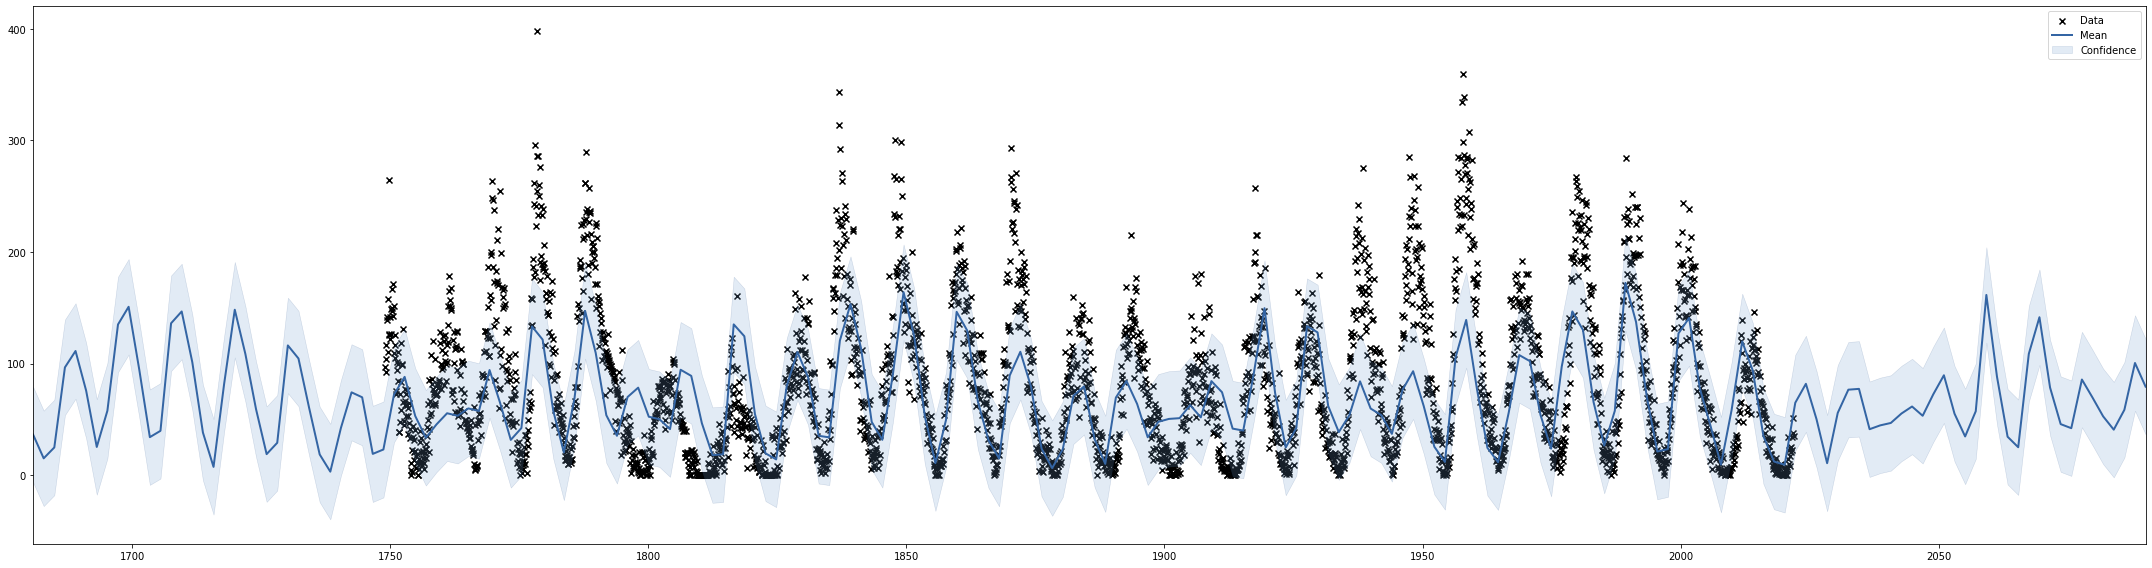

In [16]:
k = GPy.kern.StdPeriodic(1)
model = GPy.models.GPRegression(X,y,k) 
model.optimize(max_iters=20, messages=True)
model.plot(figsize=(30,8))


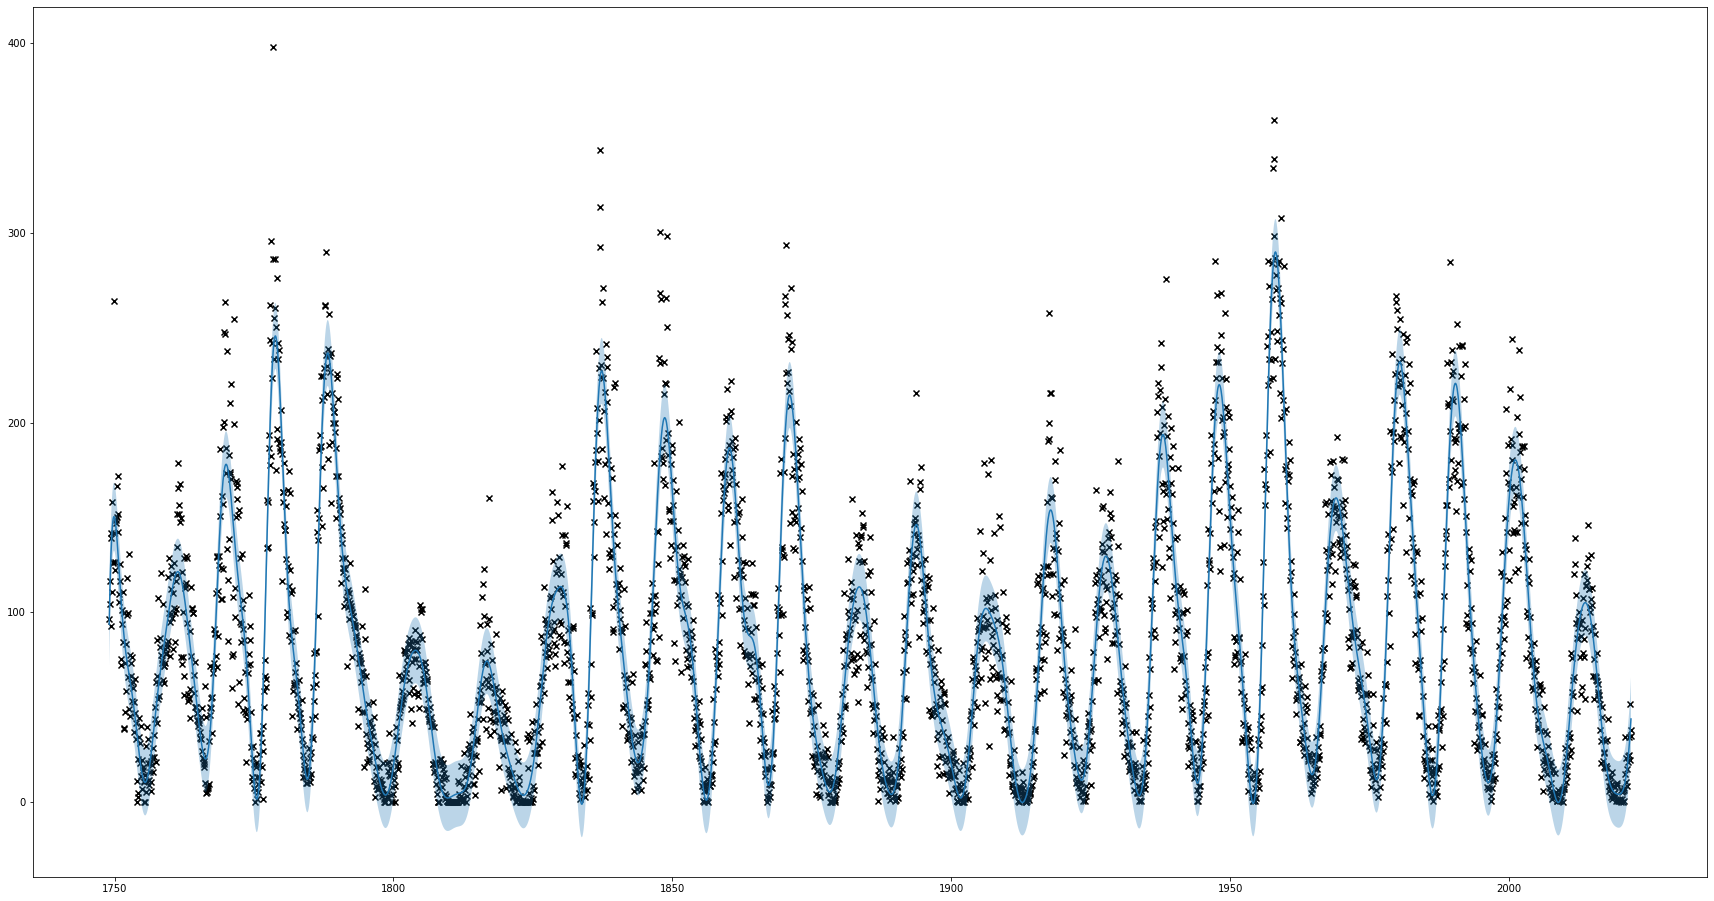

In [90]:
ynorm = (y - y.mean())/y.std()

model = GPy.models.GPRegression(X,ynorm,kernel) 
model.optimize(max_iters=20, messages=True)
# model.plot(figsize=(30,8))
m, v = model.predict(X)
fig, ax = plt.subplots(figsize=(30,16))
ax.scatter(X, y, c='k', marker='x')
ax.plot(X, m * y.std() + y.mean())
ax.fill_between(X.flatten().tolist(), ((m-1.96*v)*y.std() + y.mean()).flatten().tolist(), ((m+1.96*v)*y.std() + y.mean()).flatten().tolist(), alpha=0.3)

(array([107.,  47.,  83., 161., 284., 378., 547., 817., 690., 161.]),
 array([0.        , 0.59894625, 1.19789251, 1.79683876, 2.39578502,
        2.99473127, 3.59367753, 4.19262378, 4.79157004, 5.39051629,
        5.98946254]),
 <BarContainer object of 10 artists>)

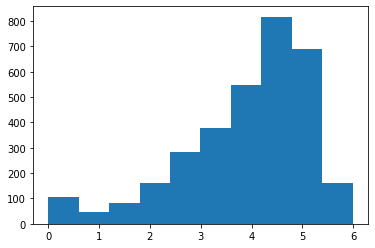

In [89]:
plt.hist(np.log(y + 1))

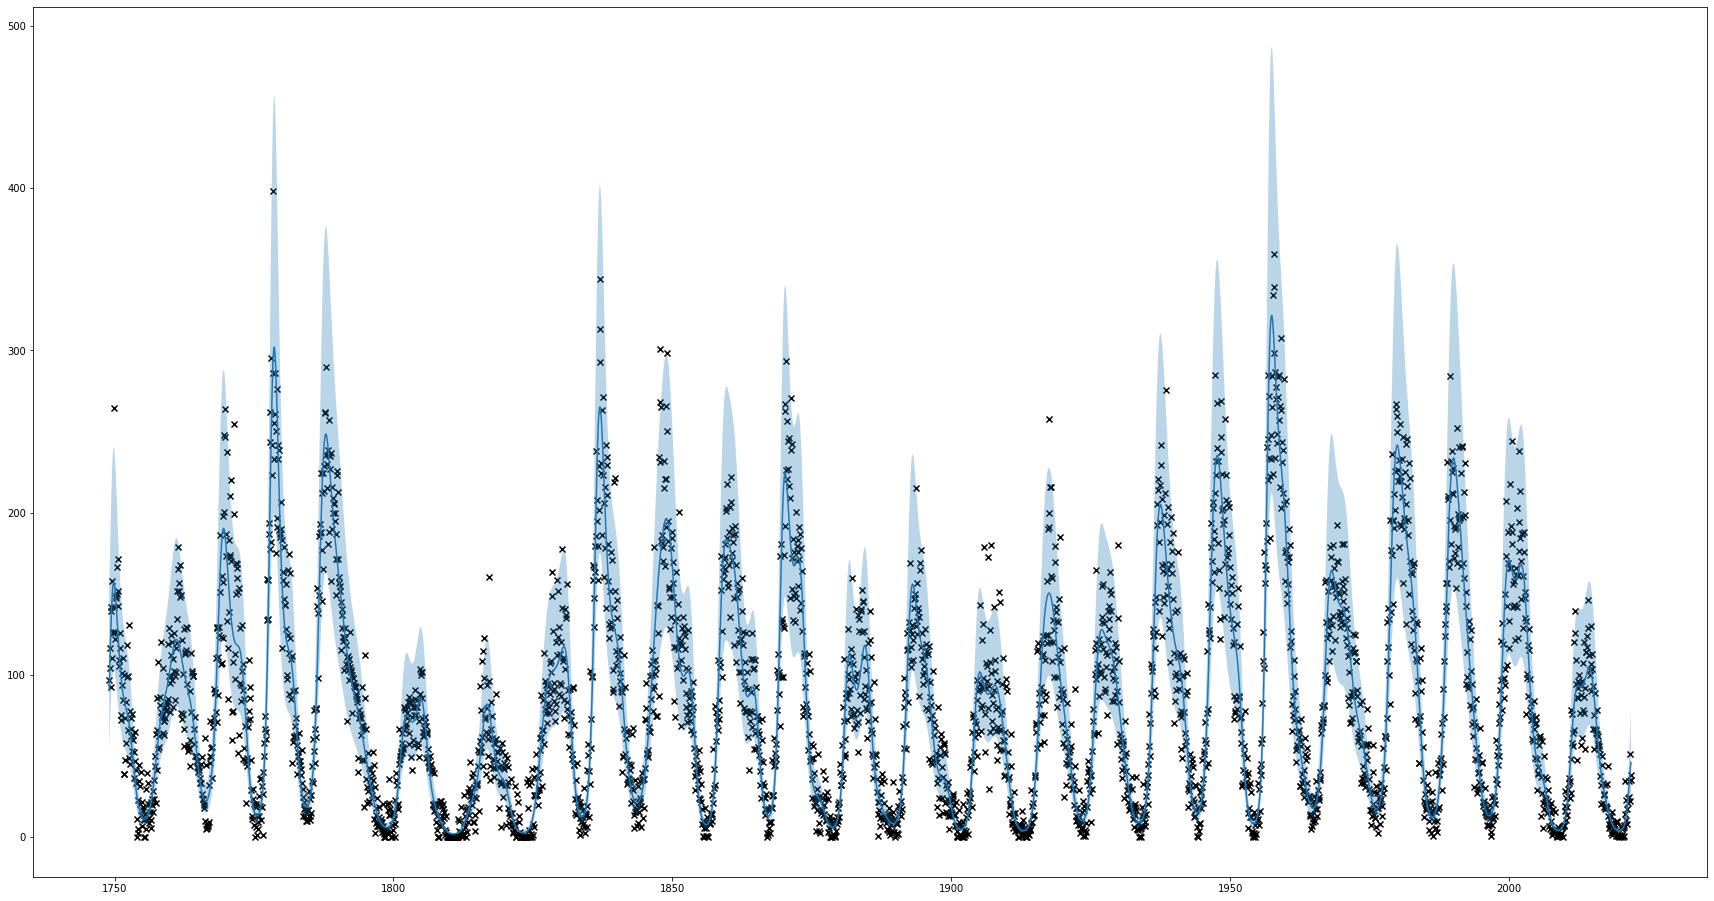

In [94]:
y_log = np.log(y + 1)
ynorm = (y_log - y_log.mean())/y_log.std()

model = GPy.models.GPRegression(X,ynorm,kernel) 
model.optimize(max_iters=20, messages=True)
# model.plot(figsize=(30,8))
m, v = model.predict(X)

fig, ax = plt.subplots(figsize=(30,16))
ax.scatter(X, y, c='k', marker='x')
ax.plot(X, np.exp(m * y_log.std() + y_log.mean()) + 1)
ax.fill_between(X.flatten().tolist(), 
    (np.exp((m-1.96*v)*y_log.std() + y_log.mean()) + 1).flatten().tolist(), 
    (np.exp((m+1.96*v)*y_log.std() + y_log.mean()) + 1).flatten().tolist(), alpha=0.3)

{'dataplot': [<matplotlib.collections.PathCollection at 0x2d282328708>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d284ea1748>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d284eabf08>]}

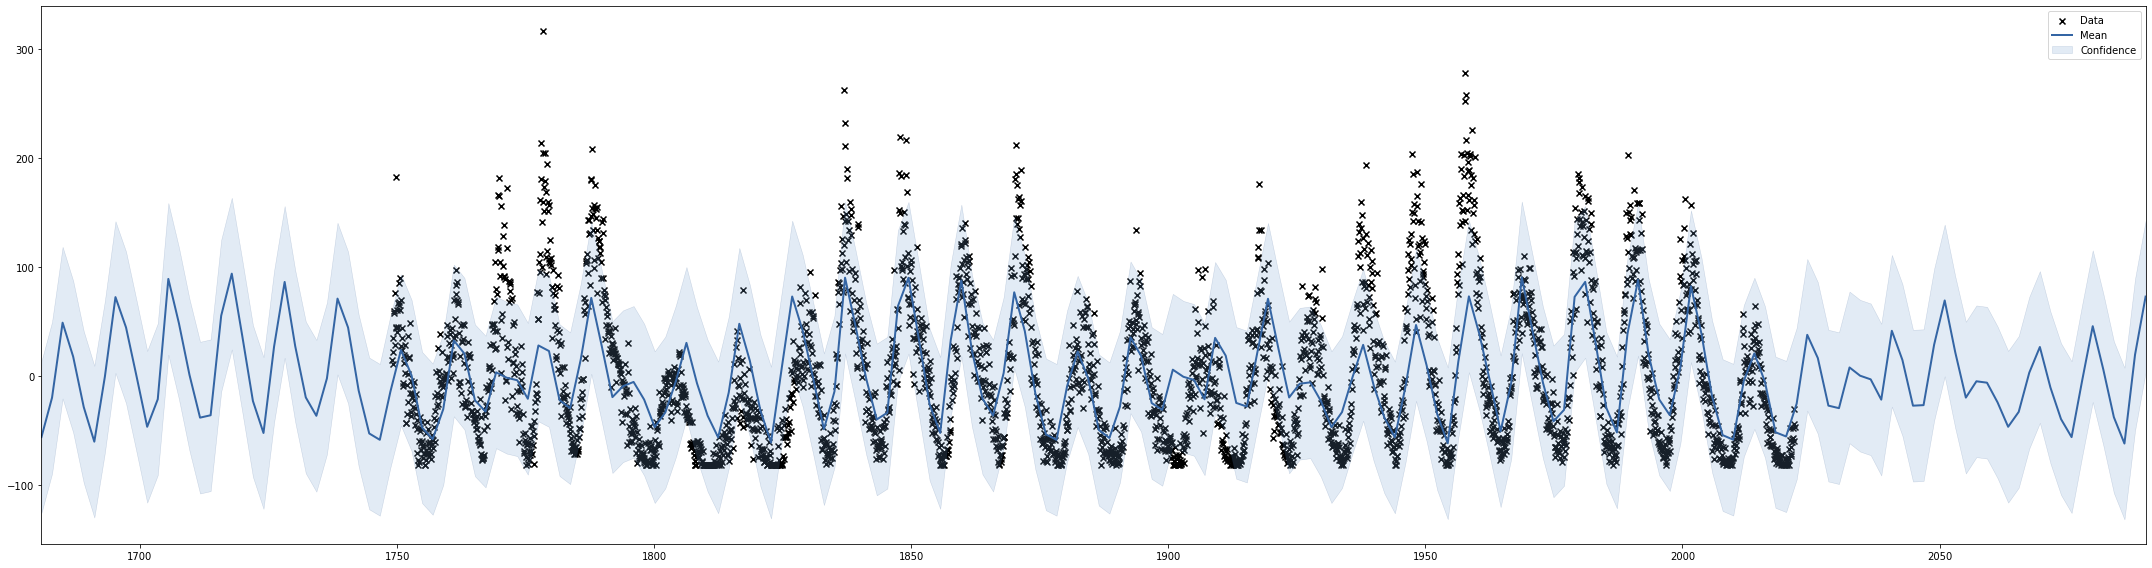

In [97]:
k = GPy.kern.StdPeriodic(1, period=11)
model = GPy.models.GPRegression(X,y - y.mean(),k) 
model.optimize(max_iters=20, messages=True)
model.plot(figsize=(30,8))

{'dataplot': [<matplotlib.collections.PathCollection at 0x2d284f0bc08>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d284f4fb88>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d284f65ec8>]}

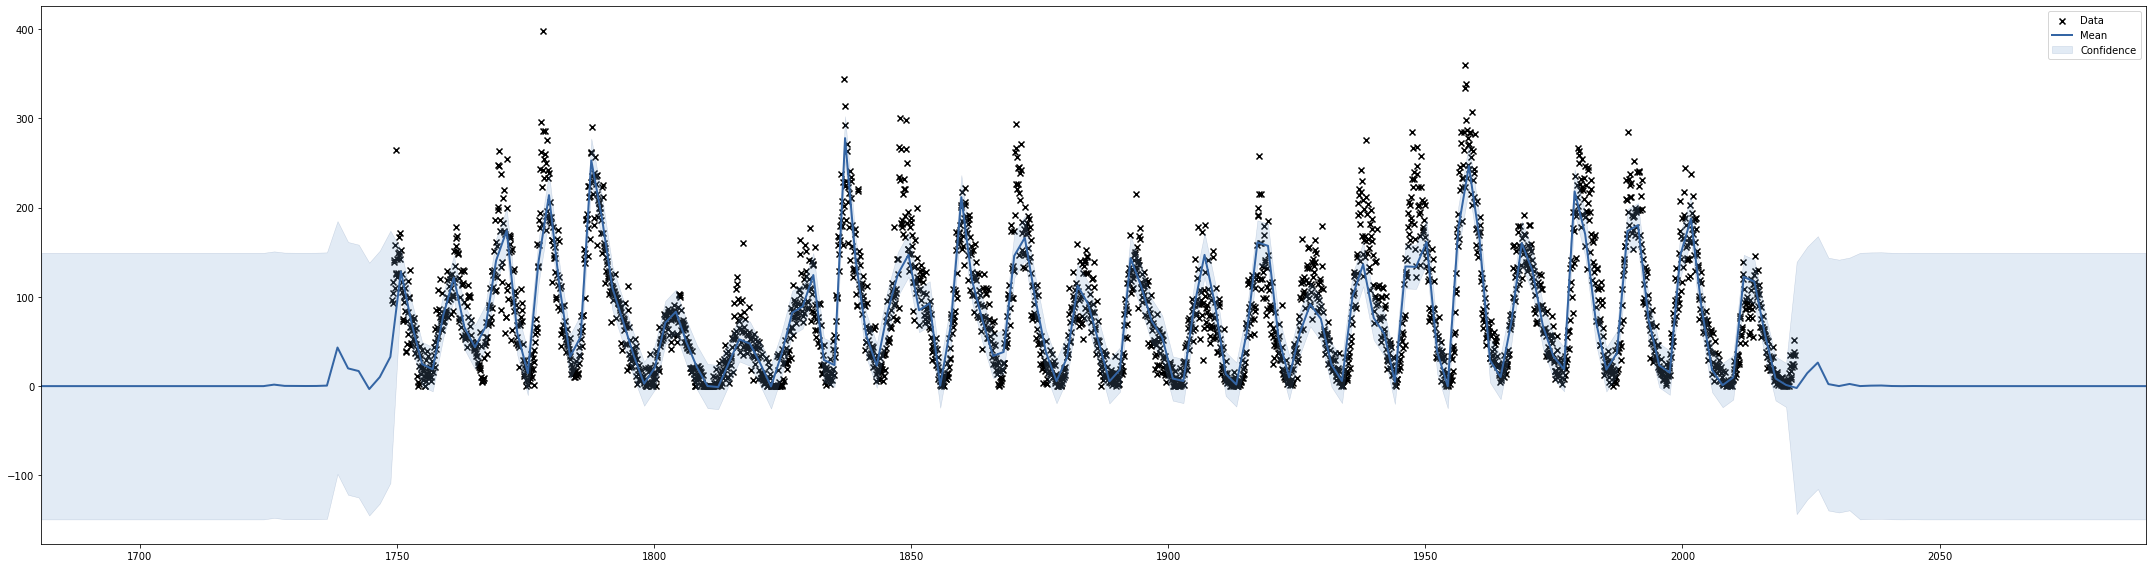

In [99]:
k = GPy.kern.StdPeriodic(1, period=11) * GPy.kern.RBF(1, sigma_f, l)
model = GPy.models.GPRegression(X,y,k) 
model.optimize(max_iters=20, messages=True)
model.plot(figsize=(30,8))

{'dataplot': [<matplotlib.collections.PathCollection at 0x2d28402c248>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2d283939648>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2d284035188>]}

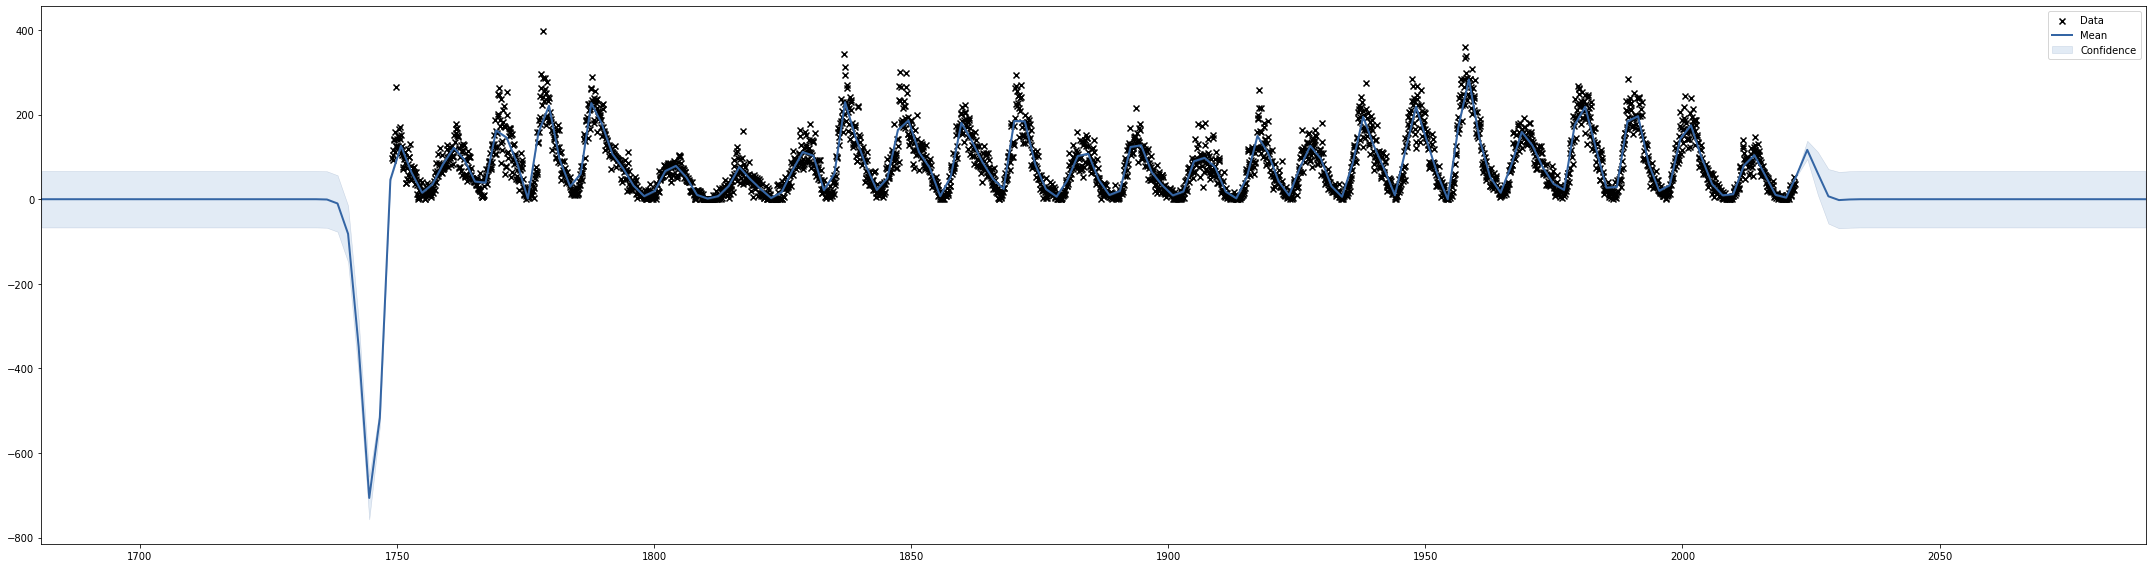

In [119]:
k = GPy.kern.StdPeriodic(1, period=11) * GPy.kern.RBF(1, 76.5, 7.75)
# model = GPy.models.WarpedGP(X,y,kernel, normalizer=False)
model = GPy.models.GPRegression(X,y,kernel, normalizer=False)
# model.optimize(max_iters=20, messages=True)
model.plot(figsize=(30,8))